# Autovalores y autovectores

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/manuxch/calculo_avanzado/blob/main/7-autovalores-autovectores/code/autovalores-autovectores.ipynb)

## Ejercicio 1

Para comprobar que $\vec{v}$ es un autovector de $A$, debe cumplirse que:
$$ A \vec{v} = \lambda \vec{v} $$
Hacemos el producto de $A$ por $\vec{v}$:
$$ \begin{bmatrix} 53 & -70 \\ 35 & -46 \end{bmatrix} \cdot \begin{bmatrix} 7 \\ 5 \end{bmatrix} = 
\begin{bmatrix} 21 \\ 15 \end{bmatrix} $$
Podemos ver que el resultado lo podemos escribir como
$$ \begin{bmatrix} 21 \\ 15 \end{bmatrix} = 3 \begin{bmatrix} 7 \\ 5 \end{bmatrix} $$
por lo tanto 
$$ \begin{bmatrix} 53 & -70 \\ 35 & -46 \end{bmatrix} \cdot \begin{bmatrix} 7 \\ 5 \end{bmatrix} = 
3 \begin{bmatrix} 7 \\ 5 \end{bmatrix} $$
lo que muestra que $\vec{v}$ es un autovector de $A$ con autovalor $\lambda = 3$.

El módulo `SymPy` de Python permite la manipulación de matrices y el cálculo de sus autovalores y autovectores:

In [1]:
from sympy import Matrix, pprint
A = Matrix([[53, -70], [35, -46]]) # Definimos la matriz A
v = Matrix([7, 5])                 # Definimos el vector v como matriz columna
print(A.eigenvals())               # Mostramos los autovalores de A

{4: 1, 3: 1}


Lo que resulta es un un **diccionario** (notar que está delimitado por llaves) cuyas claves son 
los autovalores de $A$, y como valor encontramos la multiplicidad del autovalor. Recordar que los
autovalores son las raíces del polinomio característico, y es posible que un polinomio tenga raíces
múltiples. En este caso, como la matriz $A$ es $2 \times 2$, el polinomio caracteríostico es de segundo grado, por lo que tiene dos raíces, una de ellas (3) es la que hallamos al verificar el autovector.

Para hallar los autovalores hacemos lo siguiente:

In [2]:
sol = A.eigenvects()
for s in sol:
    print(s[0])
    pprint(s[2][0])

3
⎡7/5⎤
⎢   ⎥
⎣ 1 ⎦
4
⎡10/7⎤
⎢    ⎥
⎣ 1  ⎦


La salida de `eigenvects()` consiste en una lista con dos elementos, una por cada autovalor. A su vez, cada elemento es una tupla que contiene al autovalor, su multiplicidad, y el autovector asociado, en ese orden.

Notar que los autovectores se muestran con una de las componentes con valor $1$. 

## Ejercicio 3

Si $\vec{u}$ y $\vec{v}$ son autovectores de $A$ asociados a $\lambda$, tenemos que 
$A \vec{u} = \lambda \vec{u}$ y $A \vec{v} = \lambda \vec{v}$. Entonces:

a) 
$$ A \cdot(\vec{u} + \vec{v}) = A \vec{u} + A \vec{v} = \lambda \vec{u} + \lambda \vec{v} = 
\lambda (\vec{u} + \vec{v}) $$
Por lo tanto $\vec{u} + \vec{v}$ es un autovector de $A$ con autovalor asociado $\lambda$.

b)
$$ 3 A \cdot \vec{v} = 3 \cdot A \vec{v} = 3 \lambda \vec{v} $$
por lo que $\vec{v}$ es un autovector de $3A$ con autovalor $3 \lambda$.

## Ejercicio 4

El teorema del círculo de Gerschgorin establece que los autovalores se hallan en las regiones delimitadas por 
círculos del plano complejo cuyos centros están sobre el eje real, ubicados en los valores de la diagonal de la matriz, y los radios se hallan, para cada centro, sumando los valores absolutos de los demás elementos de la fila (excepto los valores sobre la diagonal). 

En este caso, dada la matriz
$$ \begin{bmatrix} 1 & 2 & -1 \\ 2 & 7 & 0 \\ -1 & 0 & 5 \end{bmatrix} $$
los centros se ubican en los valores $c_1 = 1, c_2 = 7, c_3 = 5$, mientras que los radios para cada centro son:
$$ \begin{align*}
r_1 &= |2| + |-1| = 3 \\
r_2 &= |2| + |0| = 2 \\
r_3 &= |-1| + |0| = 1
\end{align*} $$
Podemos utilizar el módulo `matplotlib`  de Python para graficar estos círculos:

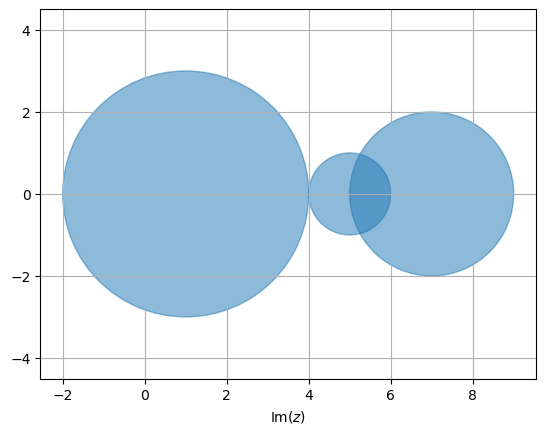

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
alfa = 0.5 # Transparencia de los círculos
c1 = plt.Circle((1, 0), 3, color='tab:blue', alpha = alfa) 
c2 = plt.Circle((7, 0), 2, color='tab:blue', alpha = alfa) 
c3 = plt.Circle((5, 0), 1, color='tab:blue', alpha = alfa) 
ax.add_patch(c1)
ax.add_patch(c2)
ax.add_patch(c3)
ax.set_xlabel(r'Re$(z)$')
ax.set_xlabel(r'Im$(z)$')
plt.grid()
plt.axis('equal')
plt.show()

Podemos ver que los círculos definen una región que comprende los valores reales entre $-2$ y $9$, por lo que
$$ \sigma(A) \subset [-2, 9] $$

## Ejercicio 5

Para hallar los autovalores de la matriz $A$, hay que encontrar las raíces del polinomio característico:
$$ 
\begin{align*} |(A - \lambda I)| &= 
\left| \begin{bmatrix} -13 & 20 \\ -12 & 18 \end{bmatrix} - \lambda \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right| 
= \left| \begin{bmatrix} -13 - \lambda & 20 \\ -12 & 18 - \lambda \end{bmatrix} \right| \\
&= (-13 - \lambda) (18 - \lambda) - 20 (-12) \\
&= \lambda^2 - 5 \lambda + 6 = (\lambda - 2) (\lambda - 3)
\end{align*} $$
Las raíces resultan, entonces, $\lambda_1 = 3, \lambda_2 = 2$, o equivalentemente, el espectro de $A$ es 
$\sigma(A) = \{2, 3\}$.

Para el autovalor $\lambda_1 = 2$, el autovector correspondiente resulta de resolver el sistema:
$$ \begin{bmatrix} -13 - 2 & 20 \\ -12 & 18 - 2 \end{bmatrix} \begin{bmatrix} v_x \\ v_y \end{bmatrix} = 
\begin{bmatrix} 0 \\ 0 \end{bmatrix} $$
que consiste en el sistema de ecuaciones:
$$ \begin{align*}
-15 v_x + 20 v_y &= 0 \\
-12 v_x + 16 v_y &= 0
\end{align*} $$
De la primera ecuación tenemos:
$$v_x = \frac{4}{3} v_y $$
reemplazando en la segunda:
$$ -12 \frac{4}{3} v_y + 16 v_y = -16 v_y + 16 v_y = 0$$
Se cumple para cualquier valor de $v_y$, por lo que podemos elegir como solución $v_y = 3, v_x = 4$ y nuestro autovector correspondiente al autovalor $\lambda_1 = 2$ resulta $\vec{v}_1 = [4, 3]^{\intercal}$. Del mismo modo, para el autovalor
$\lambda_2 = 3$ el autovector asociado es $\vec{v}_2 = [5, 4]^{\intercal}$.

Nuevamente, podemos hacer uso del módulo `SymPy` para que haga los cálculos por nosotros:

In [4]:
from sympy import Matrix, pprint
A = Matrix([[-13, 20], [-12, 18]])
sol = A.eigenvects()
for s in sol:
    print(f'Autovalor {s[0]}, autovector:')
    pprint(s[2][0])


Autovalor 2, autovector:
⎡4/3⎤
⎢   ⎥
⎣ 1 ⎦
Autovalor 3, autovector:
⎡5/4⎤
⎢   ⎥
⎣ 1 ⎦


## Ejercicio 7

Para resolver este ejercicio vamos a escribir una función en Python que implemente el método de las potencias, dado que resolver _a mano_ cada problema se vuelve una tarea muy tediosa.

In [5]:
import numpy as np

def metodo_potencia(A, num_iteraciones):
    """Función que implementa el método de la potencia
    para determinar el autovalor dominante y su correspondiente
    autovector.

    Parameters:
    A (numpy array): Matriz 
    num_iteraciones (int): Número de iteraciones

    Returns:
    autovalor (double): Autovalor domintante
    x (numpy array): Autovector correspondiente
    """
    n = A.shape[0] # Cantidad de filas de A
    # Inicializamos un vector con componentes aleatorias de dimensión n
    x = np.random.rand(n)
    # Normalizamos el vector
    x = x / np.linalg.norm(x)

    for _ in range(num_iteraciones):
        y = np.dot(A, x)
        # Obtenemos la norma máxima
        y_abs = np.abs(y)
        autovalor = y_abs.max()
        # Normalizamos el vector resultante
        x = y / autovalor
    # Devolvemos el autovalor dominante y su autovector
    return autovalor, x
    

Ahora definimos las matrices a las que les aplicaremos el método de las potencias. Recordemos que podemos representar una matriz como un array de numpy compuesto de tantos elementos como filas tenga la matriz, y en la que cada elemento a su vez tiene tantos elementos como columnas de la matriz.

In [6]:
A = np.array([[4, 2, 4], [3, 0 , 4], [1, 2, 5]])
B = np.array([[0, 1, 0, 1, 0],
              [1, 0, 1, 0, 1],
              [0, 1, 0, 1, 0],
              [1, 0, 1, 0, 1],
              [0, 1, 0, 1, 0]])
C = np.array([[1, 2, 3, 4, 5, 6],
              [7, 8, 9, 10, 11, 12],
              [13, 14, 15, 16, 17, 18],
              [19, 20, 21, 22, 23, 24],
              [25, 26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35, 36]])

Para poder hacer los cálculos iterando sobre las matrices, las organizamos dentro de un diccionario de Python:

In [7]:
matrices = {'A': A, 'B': B, 'C':C}

Ahora iteramos sobre este diccionario, aplicando el método de las potencias sobre cada elemento:

In [8]:
n_iter = 50
for matriz in matrices.keys():
    autoval, autovec = metodo_potencia(matrices[matriz], n_iter)
    print(80 * '-')
    print(f"Autovalor dominante de {matriz} = {autoval}")
    print("Autovector asociado:")
    print(autovec)

--------------------------------------------------------------------------------
Autovalor dominante de A = 8.32718457554116
Autovector asociado:
[1.         0.70950456 0.72704386]
--------------------------------------------------------------------------------
Autovalor dominante de B = 2.0
Autovector asociado:
[1.         0.56052194 1.         0.56052194 1.        ]
--------------------------------------------------------------------------------
Autovalor dominante de C = 116.41182151274086
Autovector asociado:
[0.12795692 0.30236554 0.47677415 0.65118277 0.82559138 1.        ]
